# Bulding a Logistic Regression model in Python

Logistic Regression is a type of probabilistic classification model. It works best for a binary output (e.g., predicting whether someone has a disease or not; predicting if a credit card transaction is likely to be fraudulent or not; predicting whether someone is likely to survive the Titanic or not). 

## The difference between probability and likelihood

### Probability

Probability refers to finding the chance that something happens given a sample distribution of data. For example, if we collected income data from 100 people which was normally distributed and had the following characteristics: $$ \mu = 50,000 $$ and $$ \sigma = 5 ,000$$ we could calculate the *probability* that someone has a salary greater than $48,000. First we find the z-score: $$ z = {x - \mu \over \sigma} $$ thus $$ z = {48,000 - 50,000 \over 5,000} $$ which results in $$ z = -0.4 $$

Then, we can look up the corresponding z-value in the z-table which equals 0.34458. Now we can calculate the probability that someone makes more than $48,000 by calculating $$P(>48,000) = 1-0.34458 = 0.65542$$ Therefore, there is a 65% chance a randomly selected person makes more than $48,000

### Likelihood

*Likelihood* flips the question around and essentially tries to figure out the best characteristics (probability distribution) of data given a particular value. For example, if we collected a bunch of income data (let's say 100 observations), and we observed that most of the observations are between $45,000 and $50,000, which distribution (normal, exponential, gamma) with what characteristics (mean, standard deviation) would maximize the likelihood that we observe what we observed? We could check a whole bunch of different distributions (e.g., normal distribution with mean of $30,000 and stdev of $2,000, OR normal distribution with mean of $48,000 and stdev of $3,000, and so on) and how they fit the data, and we would pick the distribution and characteristics which maximize the likelihood that we see what we saw in our data (i.e., if our collected data had an average income of $48,000, we would pick the distribution which has this average as well). Basically, we are trying to find the best distribution as opposed to already having the distribution available. Once we find the best distribution, we can calculate probabilities!

### Maximum Likelihood Estimation

In the real world, a common modelling problem is the question of estimating a joint probability distribution for a dataset. Density estimation would involve selecting a probability distribution function and the parameters that best explain the joint probability of observed data, so the obvious questions are: How should you choose the distribution function? How should you choose the parameters for the probability density function?

Two common techniques are Maximum a Posteriori (MAP) and Maximum Likelihood Estimation (MLE). MLE assumes that all solutions are equally likely, while MAP takes into account prior information about the form of the solution.

MLE treats the problem as an optimization problem (i.e., searching for the optimal solution). We wish to maximize the probability of observing the data from a joint probability distribution given a distribution and parameters that we already know. Mathematically this is stated as:

$$ P(X | \theta)$$ 

where theta is an unknown parameter. The resulting conditional probability is referred to as the *likelihood* of observing the data given the model parameters and uses the notation: 
$$L(X | \theta)$$

Calculating conditional probabilities, gven a sample comprises of n-examples, this can be framed as the joint probabilty of the observed data samples (x1, x2...xn) given the probability distribution parameters. The joint probability distribution can be restated as the multiplication of the conditional probability of observing each example, given the distribution parameters.

Multiplying all the small probabilities, however, is time consuming, so we can restate this further as the sum of the log conditional probabilities of observing each example given the model parameters. This is what leads to the use of the term *log-likelihood function*.

When we are *fitting* a machine learning model, we are essentially trying to estimate probability density - i.e., finding the best parameters or settings that explain the data. The Maximum Likelihood Estimation (MLE) framework is used for density estimation in both supervised and unsupervised models (and in neural nets) - it provides the basis for both Linear and Logistic Regression models. In summary, you can think of it as an optimization problem of searching a whole bunch of parameters in order to find the BEST parameters.


### The good stuff - Logistic Regression

You should use the slides to supplement your learning but this will be more detailed and probably better. Yes, you can use this for the exam. Yes, the exam will include content from this notebook (I guess you would only know that if you read this far already!!). Don't worry; I'll remind you to read it in class. Anyway, I digress...

As discussed, logistic regression is used *primarily* for predicting binary classes (True/False, 0/1, Yes/No type of problems). Just like linear regression, logistic regression will have a function in the form of:
$$ y = mx + b$$
Where the coefficients will tell us information about how the input variables (x-values) impact our output variable (probability of Y / 1 / True). The main difference between logistic and linear regression, is that logistic regression will produce an output that is always between 0 and 1 (0 = 0% likelihood of an outcome happening; 1=100% likelihood of an outcome happening). This translates to the 0/1 binary outcome using a probability threshold - the default threshold is 50%, meaning that if the probability of an outcome is 50% or higher, it's classified as 1 (i.e., if the probability of a credit card transaction being fraudulent is calculated as 55%, it would be classified as a 1 or Yes or True).

To calculate probabilities, we use the Sigmoid function (also called logistic function):

$$ S(x) = {1 \over 1+e^{-x}} $$

The output is interpreted as a probability from a Binomial probability distribution function for the class labeled 0 or 1. In general when we produce the function which corresponds with the model, we are estimating the coefficients / parameters from the sample of observations that we have - in theory, these samples are representative of the population. We must always remember there will be 'noise' in the data, which is what we typically consider the errors. For logistic regression, we look at MLE to estimate parameters (if you remember, for Linear regression we discussed Least Squares Optimization - this is similar).

#### Odds and log-odds

Odds, if you read the slides, are often stated as wins or losses. For example, what are the odds of me drawing a Jack of Hearts from a deck of cards? We can convert the probabilility produced by the logistic regression model to "odds of success", defined as the probability of success divided by the probability of not success:
$$ odds = {p \over (1-p)}$$

The logarithm is calculated as the log of the odds (hence, log-istic regression!):
$$log odds = {log{p\over (1-p)}}$$

Quick review here on logs -- generally with log calculations we are trying to calculate an exponent which yields a value. For example 

$$log_28 = 3$$ 
because 
$$2^3 = 8$$

When we are not provided a log base, we assume we're using e as the base, and e = 2.71

Now if we put it all together (and if you remember my drawings on the board in class); we use the logit function (above) to project odds on a scale of -infinity to + infinity - this allows to project data onto a straight line (this is the blue line in the picture on Slide 10 of the notes). This gives us:

$$y = mx + b$$

We then optimize the coefficients of this straight line, using gradient descent for example (more on this in a later class... maybe next semester). Then, we use the sigmoid function to convert the -infinity to +infinity values BACK to a probability of 0-1, so we can actually classify our outputs. In sum, the objective of our model is to predict/output a probability of belonging to class 1 or not.


In the real world, you won't have to do this by hand - but it's important to understand the logic/math behind all of the models we are learning.

### The Coding Part

Let's get to the good stuff. We'll start with probability and odds.

In [1]:
import math

# define probability of success; 
# let's say, the probability I walk into class with a 
# coffee from Sbux on Wednesday
p = 0.7
print(p)
#let's convert this to odds
odds = p / (1-p)
print(odds)
#let's convert back to probability
prob = odds / (odds + 1)
print(prob)


0.7
2.333333333333333
0.7


In [2]:
#okay, next example - log odds; start with probability again
p = 0.7
print(p)
#calculate odds
odds = p / (1-p)
print(odds)
#convert to log-odds
logodds = math.log(odds)
print(logodds)
#convert back to probability using sigmoid function
prob = 1/(1+math.exp(-logodds))
print(prob)

0.7
2.333333333333333
0.8472978603872034
0.7


Now let's start with estimating model parameters. Again, MLE is a framework we can use to estimate parameters. We are trying to maximize the conditional probability of observing the data (X) given a specific probability distribution and its parameters.

For supervised learning, we can summarize the conditional probability as predicting the probability if the output, given the input:

$$P(Y | X)$$

To calculate maximum likelihood, we need start somewhere (i.e., make an assumption about the distribution). For logistic regression, we assume a Binomial distribution. Each example in a binomial distribution is a Bernoulli trial. Since the Bernoulli distribution has a single parameter (p), we can describe this as:

$$P(y=1) = p$$
$$P(y=0) = 1-p$$

The mean of the Bernoulli distribution, therefore is:

$$\mu = P(y=1)*1 + P(y=0)*0$$

THEREFORE, to calculate likelihood of a specific input, where the probability is given by our prediction function, we have:

$$L = \hat{y}*y + (1-\hat{y})*(1-y)$$

Let us test this function here:

In [3]:
def likelihood(y,yhat):
    return yhat * y +(1-yhat)*(1-y)

y, yhat = 1,0.9
print(likelihood(y,yhat))

0.9


Now we can transform the likelihood into LOG-likelihood by adding the log function:

In [4]:
loglikelihood = math.log(yhat)*y+math.log(1-yhat)*(1-y)
print(loglikelihood)

-0.10536051565782628


To find the maximum likelihood, we can sum up all of the logs of all the likelihoods. We would essentially start with a baseline model, and continue to iterate until we have a model that maximizes likelihood. Generally we can use gradient descent (we will cover this in a later session) to find the optimal coefficients. Let's build a logistic regression function from scratch for Titanic, and then we'll do it with the sklearn library.

In [5]:
import numpy as np

#define a class which holds data and functions
class LogisticRegression:
    def __init__(self, x,y): #this is a function to initiate the class
        self.intercept = np.ones((x.shape[0],1)) #create an array of ones same length as x variable, 1 column
        self.x = np.concatenate((self.intercept,x),axis=1) #puts array of x values + array of ones side by side; note - x must be in array format
        self.weight = np.zeros(self.x.shape[1]) #makes array of zeros with the same number of columns as x
        self.y=y #output variable, also must be in array format

    #sigmoid method
    def sigmoid(self,x,weight):
        z = np.dot(x,weight) #take the dot product of x-array, and weights 
        return 1 / (1+np.exp(-z)) #sigmoid function

    #loss calculation
    def loss(self, h, y): #y is the actual class; h is the probability of the class; this is the log loss function which we want to minimize
        return (-y * np.log(h) - (1-y) *np.log(1-h)).mean() 
        
    #gradient calculation
    def gradient_descent(self, X, h, y): #gradient descent we use to minimize log function above, and find the best coefficients / straight line
        return np.dot(X.T, (h-y)) / y.shape[0]
        
    #define fitting function
    def fit(self, lr, iterations): #lr is the learning rate the model uses to determine the step size at each iteration while moving toward a minimum loss funciton - we'll cover this in gradient descent 
        for i in range(iterations): #basically we're doing a bunch of iterations; sigmoud, calculate loss, gradient descent
            sigma = self.sigmoid(self.x,self.weight)
            loss = self.loss(sigma,self.y)
            dW = self.gradient_descent(self.x, sigma, self.y)

            #update weights
            self.weight -=lr*dW #then find best weights
        return print("finito!")
        
    #predict function
    def predict(self,x_new,threshold): #fitting function, plus ability to set threshold
        x_new = np.concatenate((self.intercept, x_new), axis=1) #repeat process above
        result = self.sigmoid(x_new, self.weight)
        result = result >= threshold #returns true/false if above threshold
        y_pred = np.zeros(result.shape[0]) #create array of zeroes
        for i in range(len(y_pred)):
            if result[i] == True:
                y_pred[i] =1 #replace 0 in array if probability is above threshold
            else:
                continue
        return y_pred #return array


Let's try this out on Titanic - and then we'll use the sklearn logistic regression function and also compare results with other classifiers.

In [6]:
from seaborn import load_dataset #titanic lives in seaborn
import pandas as pd
import seaborn as sns

data = load_dataset('titanic')

In [7]:
data.head() #success! by the way, since i'm taking this from seaborn it's slightly different than the one we used in class


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
data.info() #missing data in Age, Embarked, Class, Deck, Embark Town

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


#### Cleaning and transforming data

Let's get rid of thte deck column - not useful, too many missing values. We can also remove the adult_male column, since it's redundant to sex. We can remove 'alive' since we don't care how long survivors lived, and it's redundant to survive. We can remove 'alone'. Remove Embark_town since it's redundant with Embarked. We can fill in missing values for Age and for Embarked. Also let's get rid of "who", names won't be relevant here.

In [9]:
data.drop(['alive','alone','embark_town','who','adult_male','deck','class'], axis=1,inplace=True)

In [10]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


We can fill in missing data for Age, using median by sex - this is probably the safest approach. For Embarked, we can just find the most popular value.

In [11]:
data.groupby('embarked').count()

,survived,pclass,sex,age,sibsp,parch,fare
embarked,,,,,,,
C,168,168,168,130,168,168,168
Q,77,77,77,28,77,77,77
S,644,644,644,554,644,644,644


In [12]:
data['age'] = data['age'].fillna(data.groupby('sex')['age'].transform('median'))

In [13]:
data['embarked'] = data['embarked'].fillna('S')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Now let's make dummy variables for Embarked and Sex.

In [15]:
sex_dummies = pd.get_dummies(data['sex'])
embarked_dummies = pd.get_dummies(data['embarked'])

In [16]:
data = pd.concat([data,sex_dummies,embarked_dummies],axis=1)

In [17]:
#drop old columns
data.drop(['sex','embarked'],axis=1, inplace=True)

In [18]:
data.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'female', 'male',
       'C', 'Q', 'S'],
      dtype='object')

Now we are ready. Let's try the model. Remember, we should convert our variables to numpy arrays.

In [19]:
x = np.array(data[['pclass', 'age', 'sibsp', 'parch', 'fare', 'female', 'male',
       'C', 'Q', 'S']])
y = np.array(data.survived)
 


In [20]:
#create the object
regressor = LogisticRegression(x,y)
 
#fit the model, 0.1 learning rate, anad 5000 iterations (this is how we'll find max likelihood)
regressor.fit(0.1 , 5000)
 
 
y_pred = regressor.predict(x,0.5) #use 0.5 treshold
 
print('accuracy -> {}'.format(sum(y_pred == y) / y.shape[0])) #print accuracy

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [21]:
#not good! Lets try different features
x = np.array(data[['fare', 'female','age']])
y = np.array(data.survived)

#create the object
regressor = LogisticRegression(x,y)
 
#fit the model, 0.3 learning rate this time, anad 5000 iterations (this is how we'll find max likelihood)
regressor.fit(0.3, 5000)
 
 
y_pred = regressor.predict(x,0.5) #use 0.5 treshold
 
print('accuracy -> {}'.format(sum(y_pred == y) / y.shape[0])) #print accuracy

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

The second model worked much better - I changed the learning rate to 0.3, and also reduced the number of input variables to Fare, Female (y/n), and Age. So... hopefully this gives you a good view of how we create a logistic regression. Of course we don't need to do this in the real world, so now let's use sklearn's regression and compare the results to Naive Bayes and KNN.

In [23]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, recall_score


In [24]:
# there are many more hyperparameters we can adjust in this version, 
# such as regularization terms (we'll cover this in a later module)
# weights, solver type, etc. for now, we'll keep the default settings

from sklearn.neighbors import KNeighborsClassifier


log = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier() #default neighbours is 5

In [25]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [26]:
log.fit(x_train,y_train)
nb.fit(x_train,y_train)
knn.fit(x_train,y_train)

KNeighborsClassifier()

We've spoken about classification models in the past and optimizing for the threshold (i.e., the default is 50%, but what if we wanted higher thresholds and they were more accurate?). In the example below, if I use the predict() function, I will basically get the 0/1 outputs. However, I can use a predict_proba() function so I can see the actual probabilities that the model is predicting. This will help me find an optimal threshold.

In [27]:
yhat_log = log.predict_proba(x_test)
yhat_nb = nb.predict_proba(x_test)
yhat_knn = knn.predict(x_test)

In the next cell, for each observation, we can see the probability that the observation is a 1 and the probability that it's a 0. For example, the first entry has a 73% chance of being a 0 (dead), and a 27% chance of being a 1 (alive).

In [28]:
yhat_log

array([[0.66136065, 0.33863935],
       [0.74406778, 0.25593222],
       [0.33006313, 0.66993687],
       [0.30714603, 0.69285397],
       [0.83873296, 0.16126704],
       [0.82722709, 0.17277291],
       [0.30384628, 0.69615372],
       [0.23546445, 0.76453555],
       [0.31598897, 0.68401103],
       [0.03509968, 0.96490032],
       [0.83292532, 0.16707468],
       [0.63193687, 0.36806313],
       [0.83667182, 0.16332818],
       [0.23061937, 0.76938063],
       [0.84629624, 0.15370376],
       [0.83343987, 0.16656013],
       [0.32838436, 0.67161564],
       [0.22741392, 0.77258608],
       [0.25658499, 0.74341501],
       [0.3131156 , 0.6868844 ],
       [0.83189068, 0.16810932],
       [0.82162894, 0.17837106],
       [0.33630859, 0.66369141],
       [0.32680471, 0.67319529],
       [0.81690818, 0.18309182],
       [0.81741521, 0.18258479],
       [0.8147537 , 0.1852463 ],
       [0.88082422, 0.11917578],
       [0.81862961, 0.18137039],
       [0.7163716 , 0.2836284 ],
       [0.

Let's do a quick comparison to the predict function: we can see below that the same first observation was naturally classified as a 0. 

In [29]:
log.predict(x_test)

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1])

Moving on. I'm going to isolate only the probabilities that something is a 1 (alive). 

In [30]:
yhat_log[:,1]

array([0.33863935, 0.25593222, 0.66993687, 0.69285397, 0.16126704,
       0.17277291, 0.69615372, 0.76453555, 0.68401103, 0.96490032,
       0.16707468, 0.36806313, 0.16332818, 0.76938063, 0.15370376,
       0.16656013, 0.67161564, 0.77258608, 0.74341501, 0.6868844 ,
       0.16810932, 0.17837106, 0.66369141, 0.67319529, 0.18309182,
       0.18258479, 0.1852463 , 0.11917578, 0.18137039, 0.2836284 ,
       0.14541499, 0.18807699, 0.16198598, 0.73131717, 0.16681004,
       0.33592867, 0.99895158, 0.16167305, 0.16696478, 0.17875957,
       0.16653871, 0.74512945, 0.68979271, 0.18196494, 0.6998285 ,
       0.1739433 , 0.20822896, 0.17944368, 0.15370376, 0.18020269,
       0.12105383, 0.35254016, 0.14658743, 0.69619731, 0.20362988,
       0.76708929, 0.67161564, 0.7110029 , 0.16807964, 0.76670768,
       0.16198598, 0.19740505, 0.16681004, 0.18662856, 0.1665173 ,
       0.20296472, 0.18620651, 0.19411405, 0.27694892, 0.18333364,
       0.81429005, 0.68719226, 0.24707492, 0.67622836, 0.70165

Now we can use the roc_curve() function to plot these. A True Positive will be anything over 50%, because this would be classified as a 1. A False Positive will be anything where the prediction was over 50% but actually the output should have been a 0. You can print out each element to see what it looks like.

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, yhat_log[:,1])

In [32]:
fpr

array([0.        , 0.        , 0.        , 0.00854701, 0.00854701,
       0.01709402, 0.01709402, 0.03418803, 0.03418803, 0.04273504,
       0.04273504, 0.05128205, 0.05128205, 0.07692308, 0.07692308,
       0.09401709, 0.09401709, 0.13675214, 0.13675214, 0.14529915,
       0.14529915, 0.15384615, 0.15384615, 0.16239316, 0.16239316,
       0.17094017, 0.17094017, 0.17094017, 0.18803419, 0.18803419,
       0.24786325, 0.24786325, 0.26495726, 0.26495726, 0.27350427,
       0.27350427, 0.29059829, 0.29059829, 0.30769231, 0.30769231,
       0.32478632, 0.32478632, 0.33333333, 0.33333333, 0.48717949,
       0.48717949, 0.54700855, 0.58119658, 0.5982906 , 0.5982906 ,
       0.65811966, 0.65811966, 0.66666667, 0.68376068, 0.69230769,
       0.73504274, 0.75213675, 0.82905983, 0.82905983, 0.84615385,
       0.8974359 , 0.92307692, 0.93162393, 0.94871795, 0.98290598,
       0.98290598, 1.        ])

FPR metric is a proportion

In [33]:
tpr

array([0.        , 0.01612903, 0.11290323, 0.11290323, 0.12903226,
       0.12903226, 0.16129032, 0.16129032, 0.19354839, 0.19354839,
       0.20967742, 0.20967742, 0.33870968, 0.33870968, 0.41935484,
       0.41935484, 0.5       , 0.5       , 0.51612903, 0.51612903,
       0.58064516, 0.58064516, 0.61290323, 0.61290323, 0.62903226,
       0.62903226, 0.66129032, 0.70967742, 0.70967742, 0.72580645,
       0.72580645, 0.74193548, 0.74193548, 0.75806452, 0.75806452,
       0.79032258, 0.79032258, 0.80645161, 0.80645161, 0.85483871,
       0.85483871, 0.87096774, 0.87096774, 0.90322581, 0.90322581,
       0.91935484, 0.91935484, 0.91935484, 0.91935484, 0.93548387,
       0.93548387, 0.9516129 , 0.9516129 , 0.9516129 , 0.9516129 ,
       0.9516129 , 0.96774194, 0.96774194, 0.98387097, 0.98387097,
       0.98387097, 0.98387097, 0.98387097, 0.98387097, 0.98387097,
       1.        , 1.        ])

In [34]:
thresholds

array([1.99895158, 0.99895158, 0.81900474, 0.81429005, 0.79350212,
       0.78791056, 0.77900234, 0.77258608, 0.76938063, 0.76708929,
       0.76670768, 0.76453555, 0.73131717, 0.71760086, 0.70959989,
       0.70165275, 0.69615372, 0.69026304, 0.68993714, 0.68979271,
       0.68401103, 0.68123054, 0.67726764, 0.67622836, 0.67319529,
       0.67243161, 0.67161564, 0.6512364 , 0.43825846, 0.36806313,
       0.2836284 , 0.27694892, 0.27448893, 0.27282995, 0.26927041,
       0.2612094 , 0.24707492, 0.24673094, 0.24023734, 0.22343944,
       0.21927734, 0.20822896, 0.20362988, 0.20129696, 0.18026279,
       0.18020269, 0.17711494, 0.17425591, 0.17353253, 0.17277291,
       0.16818043, 0.16810932, 0.16807964, 0.16707468, 0.16696478,
       0.16681004, 0.16656013, 0.16254269, 0.16247283, 0.16198598,
       0.15567392, 0.15370376, 0.15297475, 0.15193977, 0.13593343,
       0.12813737, 0.11917578])

Text(0, 0.5, 'True Positive Rate')

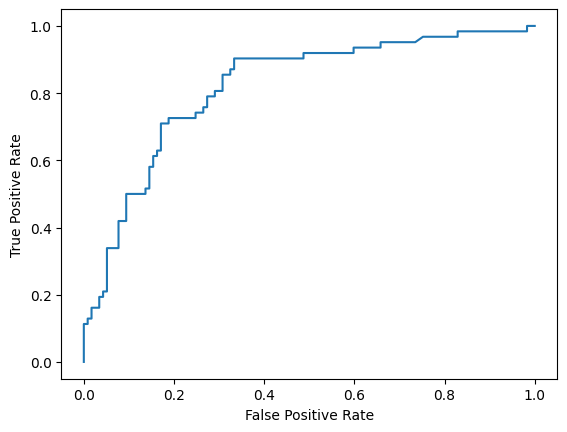

In [35]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Ideally we want this curve to be towards the top left; but in a non-ideal world, we want to find the optimal threshold. One way we can do this is by calculating the geometric mean (G-mean) which will find the balance between Sensitivity and Specificity. As a refresher:

Sensitivity = True Positive Rate \
Specificity = 1 - False Positive Rate

In other words:

Sensitivity = TP / (TP + FN) \
Specificity = TN / (FP + TN)

To calculate the G-mean, we simply take the square root of the Sensitivity multiplied by the Specificity.

In [46]:
gmeans = np.sqrt(tpr*(1-fpr))
gmeans

array([0.        , 0.12700013, 0.33601075, 0.33457173, 0.35767222,
       0.35612719, 0.39816231, 0.39468484, 0.43235558, 0.43043825,
       0.44801434, 0.44600979, 0.56686855, 0.55915569, 0.62217102,
       0.61638325, 0.6730464 , 0.65698092, 0.66749328, 0.66418064,
       0.70446995, 0.70093875, 0.72014611, 0.71649978, 0.72586619,
       0.72215329, 0.74043855, 0.76704957, 0.75910065, 0.76767833,
       0.73885432, 0.7470187 , 0.73848107, 0.74646488, 0.74211228,
       0.75773741, 0.74876978, 0.7563717 , 0.74720322, 0.7692928 ,
       0.759736  , 0.76686983, 0.76200076, 0.77598359, 0.68058263,
       0.68663238, 0.64533703, 0.62050701, 0.60771168, 0.6130193 ,
       0.56552944, 0.57038386, 0.56320893, 0.54857763, 0.54111364,
       0.50213221, 0.48976286, 0.40672592, 0.41010129, 0.38905625,
       0.3176631 , 0.27510431, 0.25937083, 0.22462173, 0.12968542,
       0.13074409, 0.        ])

In [47]:
#find the index with the highest gmean

print(thresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])


0.2012969570054761
0.7759835936631706


Now for this model, we can conclude that the best threshold is 61%, with a geometric mean of 81%. So how do we actually implement this?

Unfortunately, sklearn models don't have a threshold parameter as a hyperparameter. But, we can simply use the predict_proba() function, then assign a class based on the optimal threshold, and go from there. 

Now let's repeat the process for NB.

In [48]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, yhat_nb[:,1])
gmeans_nb = np.sqrt(tpr_nb*(1-fpr_nb))
print(thresholds_nb[np.argmax(gmeans_nb)])
print(gmeans_nb[np.argmax(gmeans_nb)])

0.10350452979616137
0.7787323300774874


In [39]:
gmeans_nb

array([0.        , 0.12700013, 0.12645623, 0.30975323, 0.3084152 ,
       0.37772993, 0.37608404, 0.45199676, 0.44801434, 0.49702728,
       0.49480343, 0.5248183 , 0.52006871, 0.53431981, 0.53186315,
       0.61008888, 0.60725782, 0.6192839 , 0.60167032, 0.61313173,
       0.61008888, 0.63228113, 0.62911178, 0.66085139, 0.65750529,
       0.67774094, 0.67078957, 0.68058263, 0.67702865, 0.7327654 ,
       0.72889854, 0.76362723, 0.73464429, 0.74276215, 0.73848107,
       0.74646488, 0.74211228, 0.74996554, 0.74554092, 0.76091452,
       0.77598359, 0.77135081, 0.77873233, 0.75005744, 0.74025234,
       0.72529621, 0.73210665, 0.71147978, 0.71803733, 0.69659853,
       0.68562779, 0.66883436, 0.67488728, 0.6633499 , 0.64565738,
       0.65139667, 0.63304377, 0.63857264, 0.6130193 , 0.61828137,
       0.54857763, 0.53804781, 0.49813548, 0.4812446 , 0.37498277,
       0.35223498, 0.35515814, 0.30413926, 0.30662207, 0.        ])

In [40]:
fpr_nb

array([0.        , 0.        , 0.00854701, 0.00854701, 0.01709402,
       0.01709402, 0.02564103, 0.02564103, 0.04273504, 0.04273504,
       0.05128205, 0.05128205, 0.06837607, 0.06837607, 0.07692308,
       0.07692308, 0.08547009, 0.08547009, 0.13675214, 0.13675214,
       0.14529915, 0.14529915, 0.15384615, 0.15384615, 0.16239316,
       0.16239316, 0.17948718, 0.17948718, 0.18803419, 0.18803419,
       0.1965812 , 0.1965812 , 0.25641026, 0.25641026, 0.26495726,
       0.26495726, 0.27350427, 0.27350427, 0.28205128, 0.28205128,
       0.28205128, 0.29059829, 0.29059829, 0.34188034, 0.35897436,
       0.38461538, 0.38461538, 0.41880342, 0.41880342, 0.45299145,
       0.47008547, 0.4957265 , 0.4957265 , 0.51282051, 0.53846154,
       0.53846154, 0.56410256, 0.56410256, 0.5982906 , 0.5982906 ,
       0.68376068, 0.7008547 , 0.74358974, 0.76068376, 0.85470085,
       0.87179487, 0.87179487, 0.90598291, 0.90598291, 1.        ])

Text(0, 0.5, 'True Positive Rate')

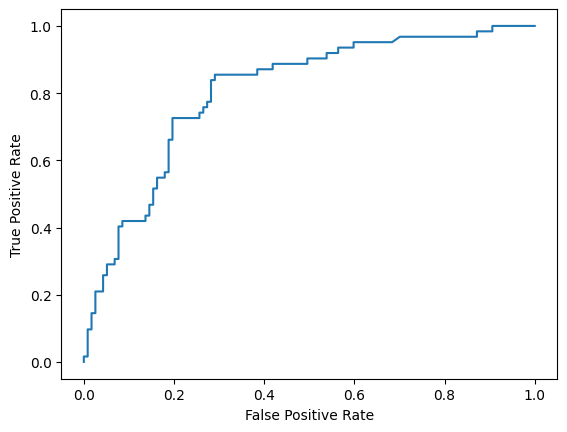

In [41]:
import matplotlib.pyplot as plt
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

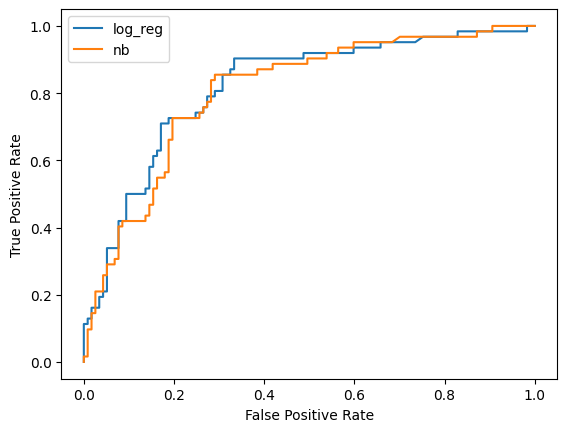

In [42]:
#now let's plot both models on the same plot so we can see how they compare
import matplotlib.pyplot as plt
plt.plot(fpr,tpr, label='log_reg')
plt.plot(fpr_nb,tpr_nb, label='nb')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

The Logistic Regression is VERY slightly better than Naive Bayes for this problem. And once again, we have not done any tuning to these models, but likely we would want to lean towards tho logistic regression.

Now, we cannot use the same method to evaluate KNN, simply because it's not a probability-based model - it uses distance. While we want to find the optimal probability threshold for NB or Logistic Regression, for KNN we would be looking for the optimal number of neighbours. To compare it to these two models though, we could use the confusion matrix, recall, precision, and F1 score. And the roc_curve which is based on predicted values, rather than probabilities.

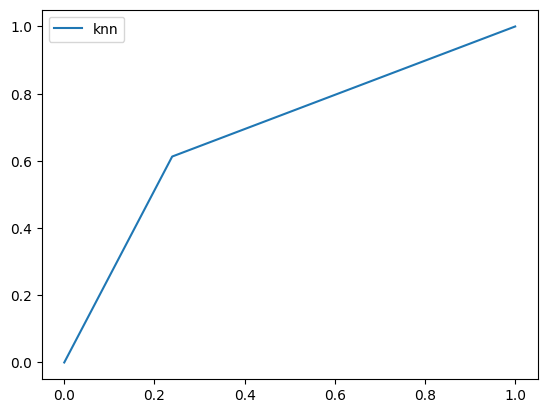

In [43]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yhat_knn)
plt.plot(fpr_knn,tpr_knn, label='knn')
plt.legend()

In [44]:
print("knn F1: ", f1_score(y_test,yhat_knn))
print("knn precision: ", precision_score(y_test,yhat_knn))
print("knn precision: ", recall_score(y_test,yhat_knn))
print("knn precision: ", accuracy_score(y_test,yhat_knn))

knn F1:  0.59375
knn precision:  0.5757575757575758
knn precision:  0.6129032258064516
knn precision:  0.7094972067039106


Overall this model performed the worst, so... we should just scrap it. AND THAT'S IT! I hope this was helpful.